In [27]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [17]:
df = pd.read_csv("IRIS.csv")  

In [18]:
label_encoder = LabelEncoder()
df['species_encoded'] = label_encoder.fit_transform(df['species'])

In [19]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species_encoded']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200)
}


results = {}
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    results[name] = accuracy_score(y_test, y_pred)


In [24]:
print("Model Performance:\n")
for model, acc in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"{model}: {acc:.2f}")


Model Performance:

Random Forest: 1.00
Support Vector Machine: 1.00
K-Nearest Neighbors: 1.00
Decision Tree: 1.00
Logistic Regression: 1.00


In [28]:

# Best model
best_model_name = max(results, key=results.get)
print(f"\nBest Performing Model: {best_model_name}\n")
print("Classification Report:\n")
print(classification_report(y_test, predictions[best_model_name], target_names=label_encoder.classes_))


Best Performing Model: Random Forest

Classification Report:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



C:\Users\balaji patil\AppData\Local\Temp\ipykernel_8340\3976152151.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette="viridis")


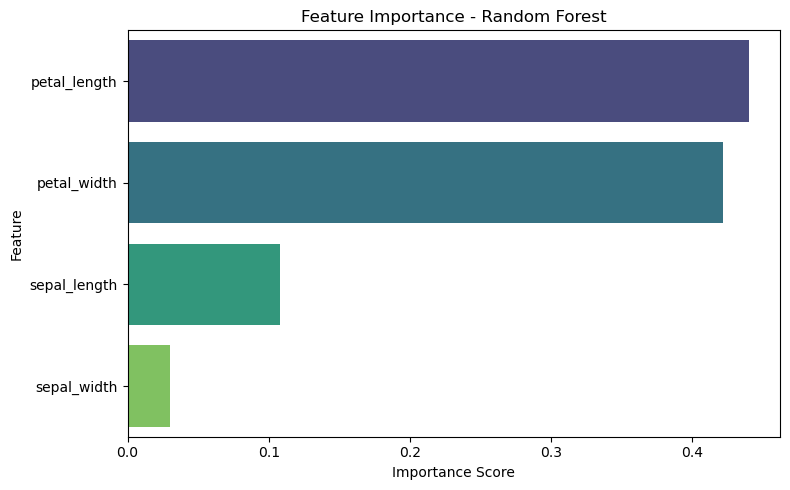

In [29]:
if "Random Forest" in models:
    rf_model = models["Random Forest"]
    importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

    plt.figure(figsize=(8, 5))
    sns.barplot(x=importances.values, y=importances.index, palette="viridis")
    plt.title("Feature Importance - Random Forest")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

In [30]:
import joblib
joblib.dump(rf_model, "iris_model.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")


['label_encoder.pkl']